In [1]:
DATA_DIR = r'/content/drive/MyDrive/cvpr/archive/train'
DATA_DIR1 = r'/content/drive/MyDrive/cvpr/archive/test'

In [2]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
CATEGORIES_T = []

for i in os.listdir(DATA_DIR):
    CATEGORIES_T.append(i)
    
print(CATEGORIES_T)

['cats', 'dogs']


In [4]:
CATEGORIES_V = []

for i in os.listdir(DATA_DIR1):
    CATEGORIES_V.append(i)
    
print(CATEGORIES_V)

['cats', 'dogs']


In [5]:
class_names = ['cats', 'dogs']

In [6]:
TRANING_DIR = []
IMG_SIZE = 224
for c in CATEGORIES_T:
    path = os.path.join(DATA_DIR, c) 
    class_num = CATEGORIES_T.index(c) 
   
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            TRANING_DIR.append([img_resized, class_num]) 
        except WException as e:
            pass
        
print(len(TRANING_DIR))


100%|█████████████████████████████████████████████████████████████████████████████| 4005/4005 [00:30<00:00, 130.00it/s]

8005


In [7]:
IMG_SIZE = 224
VALIDATION_DIR = []
for c in CATEGORIES_V:
    path = os.path.join(DATA_DIR1, c) 
    class_num = CATEGORIES_V.index(c) 
   
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            VALIDATION_DIR.append([img_resized, class_num]) 
        except WException as e:
            pass
        
print(len(VALIDATION_DIR))

100%|█████████████████████████████████████████████████████████████████████████████| 1012/1012 [00:08<00:00, 116.12it/s]

2023


In [8]:
random.shuffle(TRANING_DIR)
random.shuffle(VALIDATION_DIR)

In [9]:
X_train = []
Y_train = []

for img, label in TRANING_DIR:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,224,224,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (8005, 224, 224, 3) Y_train= (8005,)


In [10]:
X_val = []
Y_val = []

for img, label in VALIDATION_DIR:
    X_val.append(img)
    Y_val.append(label)
    
X_val = np.array(X_val).astype('float32').reshape(-1,224,224,3)
Y_val = np.array(Y_val)

print(f"X_val= {X_val.shape} Y_val= {Y_val.shape}")

X_val= (2023, 224, 224, 3) Y_val= (2023,)


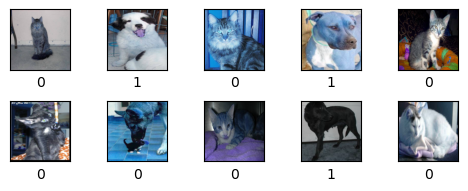

In [11]:
ROWS = 2
COLS = 5
i = 0

plt.figure(figsize=(5,2))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i].astype('uint8'))
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

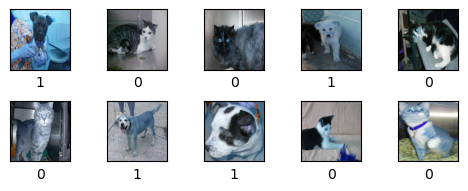

In [12]:
ROWS = 2
COLS = 5
i = 0

plt.figure(figsize=(5,2))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_val[i].astype('uint8'))
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_val[i])
        i += 1
plt.tight_layout()
plt.show()

In [32]:
 
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(224,224,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [33]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [34]:
with tf.device('/CPU:0'):
    h = model.fit(x=X_train, y=Y_train, epochs=15, validation_split=0.2, batch_size=5)

Epoch 1/15
1281/1281 [==============================] - 296s 230ms/step - loss: 1.4358 - accuracy: 0.5126 - val_loss: 0.6928 - val_accuracy: 0.5203
Epoch 2/15
1281/1281 [==============================] - 298s 232ms/step - loss: 0.6951 - accuracy: 0.5290 - val_loss: 0.6960 - val_accuracy: 0.5009
Epoch 3/15
1281/1281 [==============================] - 295s 230ms/step - loss: 0.7321 - accuracy: 0.5356 - val_loss: 0.6936 - val_accuracy: 0.5097
Epoch 4/15
1281/1281 [==============================] - 313s 245ms/step - loss: 0.6908 - accuracy: 0.5195 - val_loss: 0.6932 - val_accuracy: 0.5116
Epoch 5/15
1281/1281 [==============================] - 315s 246ms/step - loss: 0.6888 - accuracy: 0.5150 - val_loss: 0.6922 - val_accuracy: 0.5191
Epoch 6/15
1281/1281 [==============================] - 311s 243ms/step - loss: 0.6843 - accuracy: 0.5348 - val_loss: 0.6974 - val_accuracy: 0.4959
Epoch 7/15
1281/1281 [==============================] - 318s 248ms/step - loss: 0.6729 - accuracy: 0.5448 - val_

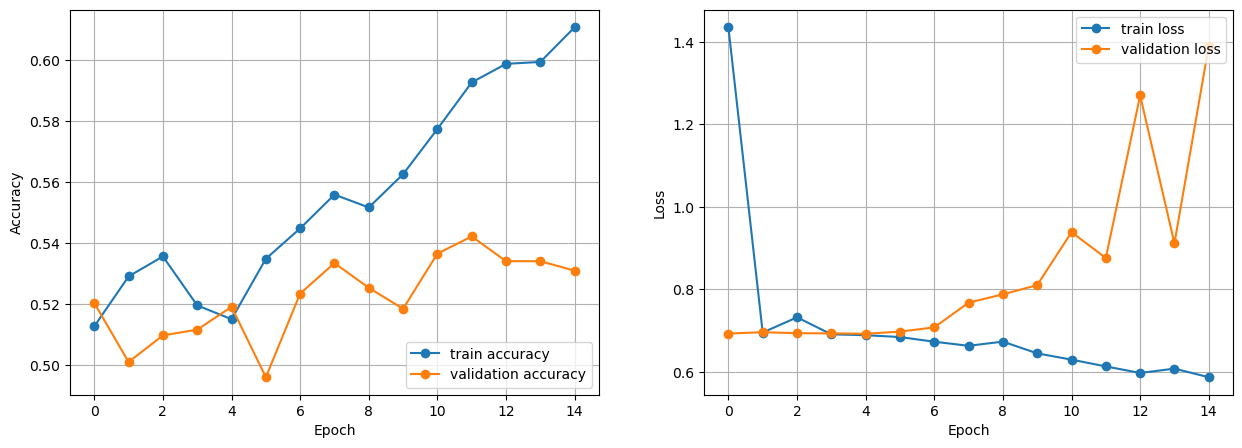

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [36]:
test_loss, test_acc = model.evaluate(X_val, Y_val)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

64/64 [==============================] - 22s 56ms/step - loss: 1.3990 - accuracy: 0.5245

Test Accuracy: 0.5244686007499695

Test Loss: 1.3989589214324951


In [38]:

predictions = model.predict(X_val)

64/64 [==============================] - 2s 27ms/step


In [39]:
predictions[0]

array([0.49465606, 0.5053439 ], dtype=float32)

In [40]:
np.argmax(predictions[0])


1

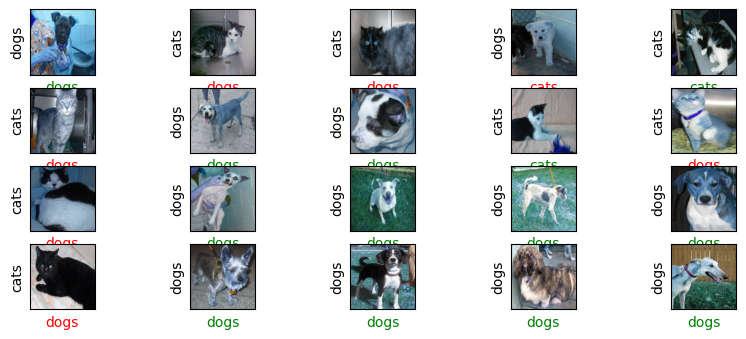

In [63]:

rows = 10
cols = 5

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(rows, cols, i+1)
    plt.imshow(X_val[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_val[i]])
    if Y_val[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

plt.show()

[]